In [86]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#loaded required libraries

In [42]:
temp = pd.read_csv('D:\DataTrained Projects\Evaluation Projects\Week 3/temperature.csv')
temp

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

In [43]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


All columns are of same datatype except date column and we could see that there are few null values in dataset

In [44]:
print(temp.isnull().values.any())
temp.isnull().sum()

True


station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

We can drop null values from dataset as most of the columns have same number of null values in dataset

In [45]:
temp.dropna(axis=0,inplace=True)


In [46]:
print(temp.isnull().values.any())
temp.isnull().sum()

False


station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

All the null values are removed

In [47]:
print(temp.size)
print(temp.shape)

189700
(7588, 25)


In [48]:
temp.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


Difference between minimum, maximum and interquartile range is not same which indicates presence of outliers.

In [55]:
temp.drop(['Date'], axis = 1, inplace = True)

In [114]:
corr_mat = temp.corr()
corr_mat

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.113301,0.133282,-0.067846,-0.169351,0.069856,0.105277,0.005822,-0.132129,0.006539,...,-0.007635,-0.013865,-0.011085,-0.239118,-0.118845,-0.256706,-0.091721,-0.021194,0.107747,0.128184
Present_Tmax,0.113301,1.000000,0.615208,-0.209059,-0.306943,0.573777,0.628705,-0.125952,0.134246,-0.316333,...,-0.104779,-0.127248,-0.107295,-0.054134,0.007695,-0.189439,-0.107079,-0.022114,0.610357,0.621048
Present_Tmin,0.133282,0.615208,1.000000,0.122200,-0.018576,0.467904,0.772061,-0.038779,-0.012817,0.084348,...,0.066207,-0.052428,-0.070391,-0.081417,-0.045174,-0.254084,-0.148423,0.059765,0.463523,0.796975
LDAPS_RHmin,-0.067846,-0.209059,0.122200,1.000000,0.578358,-0.569580,0.085237,0.289422,-0.072195,0.612831,...,0.389572,0.237512,0.167311,0.085027,-0.077590,0.100684,0.122454,0.242168,-0.446824,0.093249
LDAPS_RHmax,-0.169351,-0.306943,-0.018576,0.578358,1.000000,-0.377293,-0.118965,0.131269,0.238986,0.435937,...,0.227581,0.132436,0.118101,0.194820,0.025563,0.176557,0.219436,0.146622,-0.289788,-0.076415
LDAPS_Tmax_lapse,0.069856,0.573777,0.467904,-0.569580,-0.377293,1.000000,0.653425,-0.316011,0.043663,-0.440878,...,-0.248369,-0.193749,-0.170415,-0.044052,0.091568,-0.181433,-0.163891,0.047414,0.835729,0.589963
LDAPS_Tmin_lapse,0.105277,0.628705,0.772061,0.085237,-0.118965,0.653425,1.000000,-0.134652,-0.139675,0.008714,...,-0.002743,-0.093116,-0.103541,-0.099452,-0.024703,-0.198396,-0.187864,0.157763,0.592119,0.886513
LDAPS_WS,0.005822,-0.125952,-0.038779,0.289422,0.131269,-0.316011,-0.134652,1.000000,0.004427,0.285349,...,0.181634,0.147199,0.134428,0.033025,-0.063009,0.188540,0.169223,0.120630,-0.351107,-0.102021
LDAPS_LH,-0.132129,0.134246,-0.012817,-0.072195,0.238986,0.043663,-0.139675,0.004427,1.000000,-0.148314,...,-0.084375,0.009495,0.012372,0.133309,0.024476,0.056362,0.087517,-0.044956,0.156779,-0.060392
LDAPS_CC1,0.006539,-0.316333,0.084348,0.612831,0.435937,-0.440878,0.008714,0.285349,-0.148314,1.000000,...,0.389368,0.166763,0.088897,-0.010268,-0.007962,-0.017378,-0.023893,0.218285,-0.459705,-0.012877


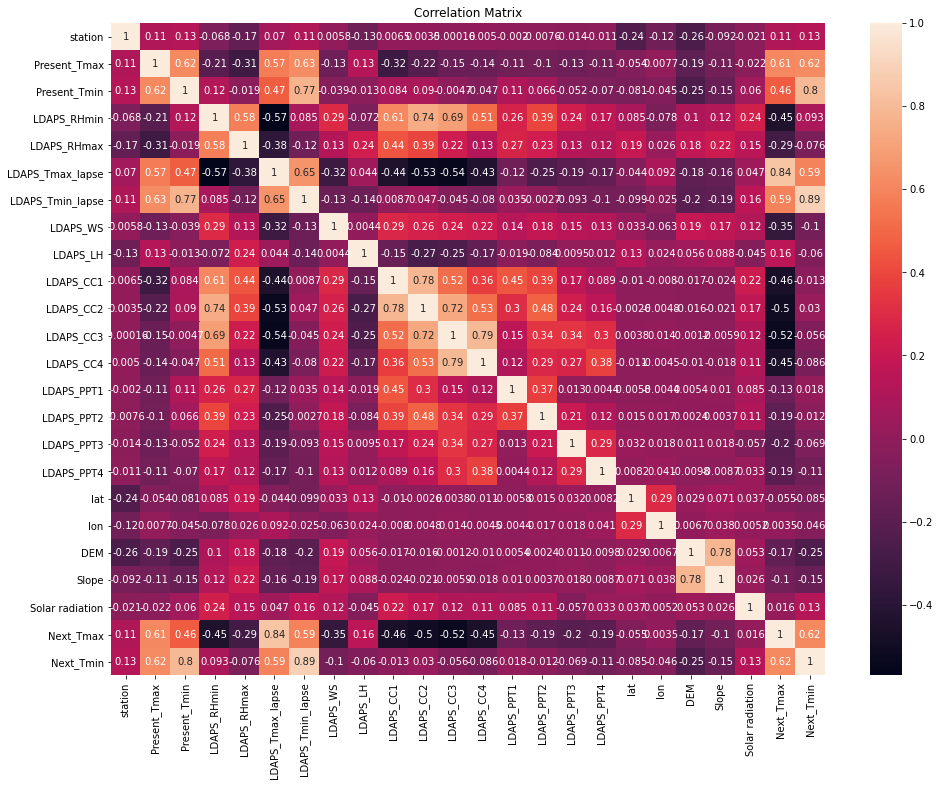

In [117]:
plt.figure(figsize=[16,12])
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.show()

In [119]:
corr_target_max = temp.corrwith(temp['Next_Tmax'], axis=0)
corr_target_max

station             0.107747
Present_Tmax        0.610357
Present_Tmin        0.463523
LDAPS_RHmin        -0.446824
LDAPS_RHmax        -0.289788
LDAPS_Tmax_lapse    0.835729
LDAPS_Tmin_lapse    0.592119
LDAPS_WS           -0.351107
LDAPS_LH            0.156779
LDAPS_CC1          -0.459705
LDAPS_CC2          -0.498295
LDAPS_CC3          -0.523061
LDAPS_CC4          -0.454039
LDAPS_PPT1         -0.125954
LDAPS_PPT2         -0.186722
LDAPS_PPT3         -0.203554
LDAPS_PPT4         -0.190720
lat                -0.055367
lon                 0.003502
DEM                -0.174578
Slope              -0.104279
Solar radiation     0.016145
Next_Tmax           1.000000
Next_Tmin           0.616629
dtype: float64

LDAPS_Tmax_lapse is having strongest relation with Next_Tmax

In [120]:
corr_target_min = temp.corrwith(temp['Next_Tmin'], axis=0)
corr_target_min

station             0.128184
Present_Tmax        0.621048
Present_Tmin        0.796975
LDAPS_RHmin         0.093249
LDAPS_RHmax        -0.076415
LDAPS_Tmax_lapse    0.589963
LDAPS_Tmin_lapse    0.886513
LDAPS_WS           -0.102021
LDAPS_LH           -0.060392
LDAPS_CC1          -0.012877
LDAPS_CC2           0.030358
LDAPS_CC3          -0.056490
LDAPS_CC4          -0.086197
LDAPS_PPT1          0.018031
LDAPS_PPT2         -0.012462
LDAPS_PPT3         -0.068664
LDAPS_PPT4         -0.114900
lat                -0.085136
lon                -0.045758
DEM                -0.249303
Slope              -0.148379
Solar radiation     0.125517
Next_Tmax           0.616629
Next_Tmin           1.000000
dtype: float64

LDAPS_Tmin_lapse is having strongest relation with Next_Tmin

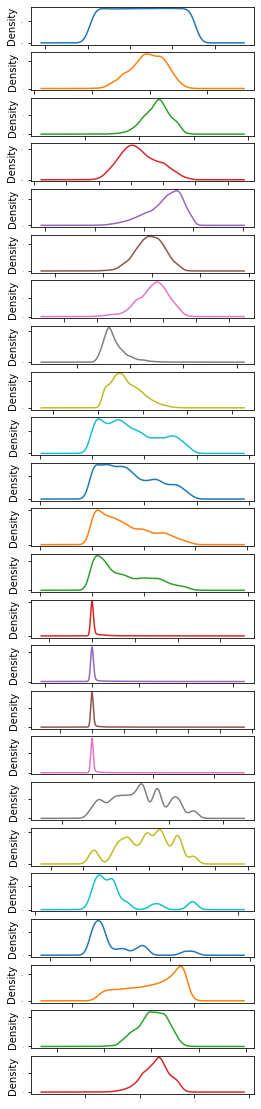

In [56]:
temp.plot(kind='density',subplots=True, sharex=False, legend=False, fontsize=1, figsize=[4,20])
plt.show()

We can see that there is skewness in dataset, so we use power transform to remove the skewness

In [57]:
temp.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
dtype: float64

In [60]:
from sklearn.preprocessing import power_transform
temp_new = power_transform(temp)
temp_new = pd.DataFrame(temp_new,columns=temp.columns)

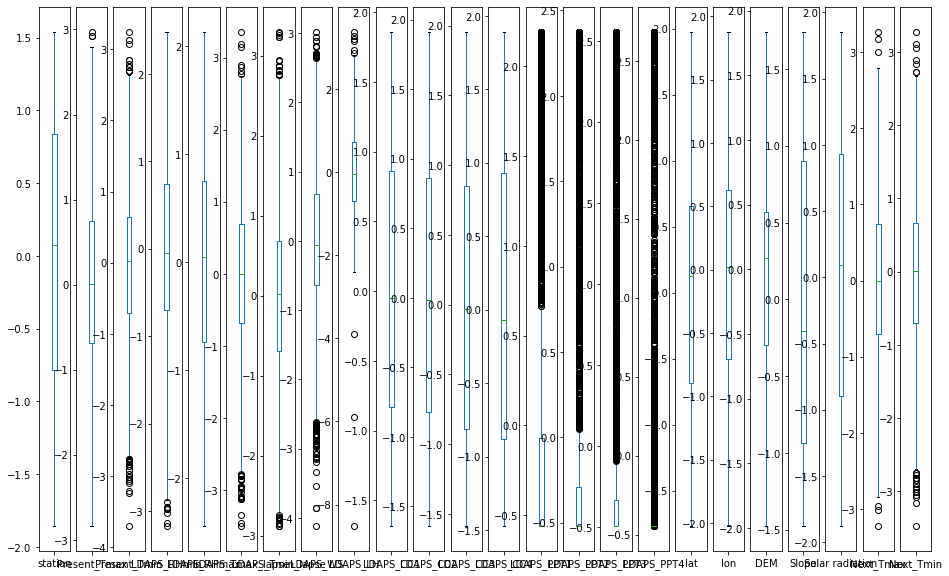

In [61]:
temp_new.plot(kind='box',subplots=True,figsize=[16,10])
plt.show()

There are few outliers in dataset, so we use to z score to remove outliers with threshold value of 3

In [62]:
from scipy import stats
z_scores = stats.zscore(temp_new)
z_scores

array([[-1.85793136, -0.40014321, -0.78589419, ...,  1.85249841,
        -0.42726068, -0.7366652 ],
       [-1.64707819,  0.70965228, -0.70806284, ...,  1.39858337,
         0.02208349, -0.23142722],
       [-1.45438283,  0.60075018, -0.0140243 , ...,  1.37832482,
         0.22246591,  0.35220967],
       ...,
       [ 1.3101266 , -2.01375687, -2.26761853, ..., -1.74973637,
        -0.67266406, -1.80150872],
       [ 1.42520815, -2.01375687, -2.08263413, ..., -1.7556299 ,
        -0.58160141, -1.57807572],
       [ 1.53907899, -2.04057179, -2.17599925, ..., -1.74010124,
        -0.82187472, -2.01515573]])

In [63]:
abs_z_scores = np.abs(z_scores)
new_entries = (abs_z_scores < 3).all(axis=1)
new_temp = temp_new[new_entries]

In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
temp_scaler=scaler.fit_transform(new_temp)
x=pd.DataFrame(temp_scaler,columns=new_temp.columns)

<AxesSubplot:xlabel='station', ylabel='Next_Tmin'>

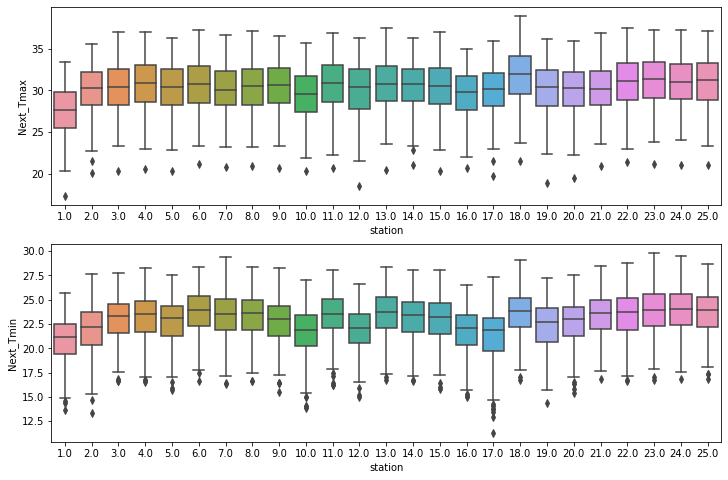

In [121]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
sns.boxplot(x='station',y='Next_Tmax',data=temp)
plt.subplot(2,1,2)
sns.boxplot(x='station',y='Next_Tmin',data=temp)

Station 18 is having highest Tmax.
Station 18 is having highest Tmin.

Station 1 is having lowest Tmax.
Station 1 is having lowest Tmin

<AxesSubplot:xlabel='lat', ylabel='Next_Tmin'>

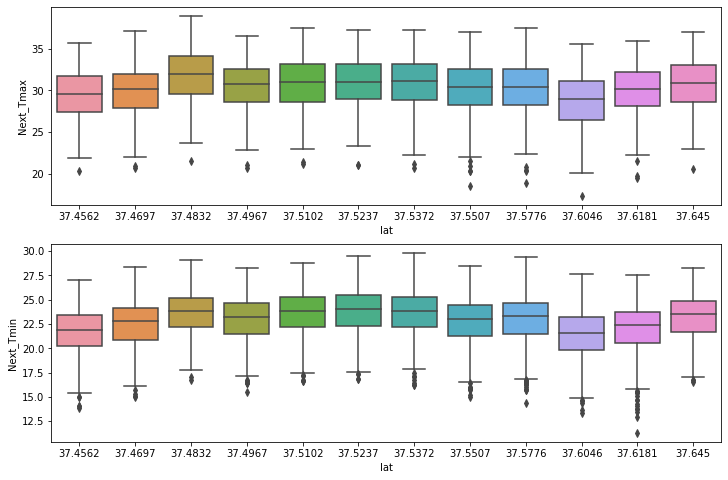

In [66]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
sns.boxplot(x='lat',y='Next_Tmax',data=temp)
plt.subplot(2,1,2)
sns.boxplot(x='lat',y='Next_Tmin',data=temp)

<AxesSubplot:xlabel='lon', ylabel='Next_Tmin'>

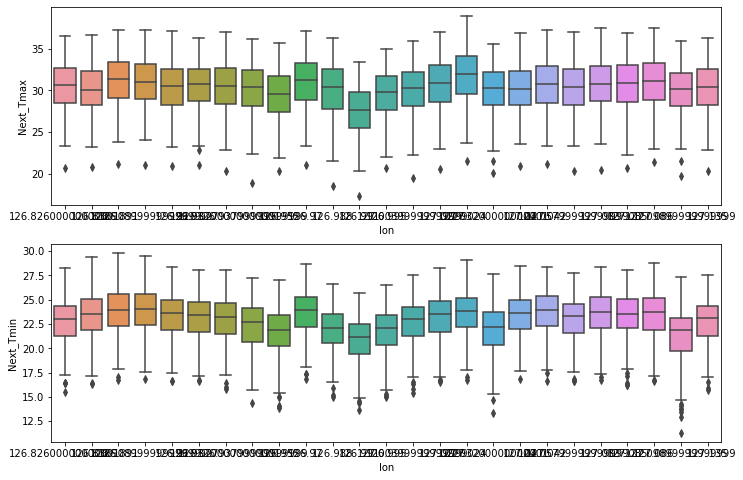

In [67]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
sns.boxplot(x='lon',y='Next_Tmax',data=temp)
plt.subplot(2,1,2)
sns.boxplot(x='lon',y='Next_Tmin',data=temp)

<AxesSubplot:xlabel='DEM', ylabel='Next_Tmin'>

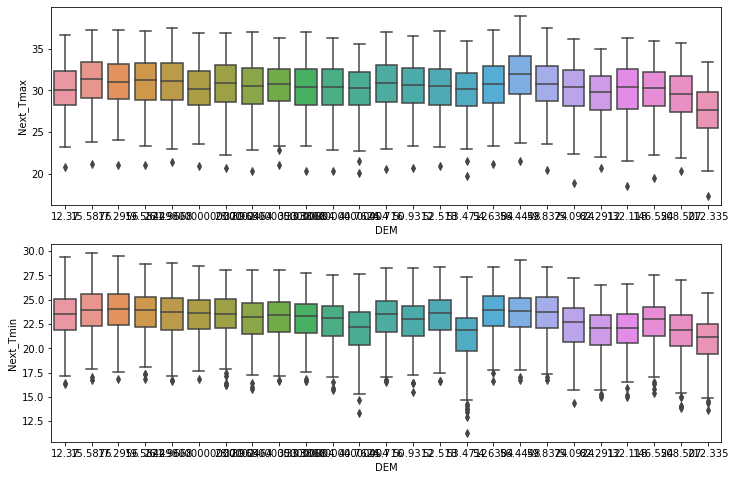

In [68]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
sns.boxplot(x='DEM',y='Next_Tmax',data=temp)
plt.subplot(2,1,2)
sns.boxplot(x='DEM',y='Next_Tmin',data=temp)

<AxesSubplot:xlabel='Slope', ylabel='Next_Tmin'>

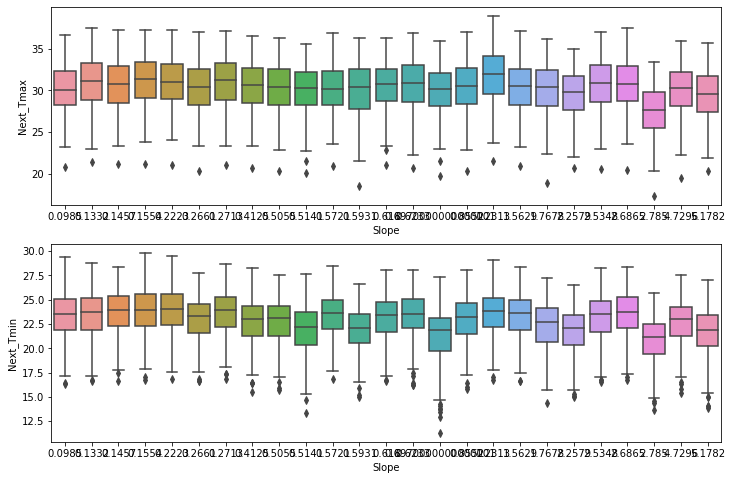

In [69]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
sns.boxplot(x='Slope',y='Next_Tmax',data=temp)
plt.subplot(2,1,2)
sns.boxplot(x='Slope',y='Next_Tmin',data=temp)

<AxesSubplot:xlabel='Present_Tmax', ylabel='Count'>

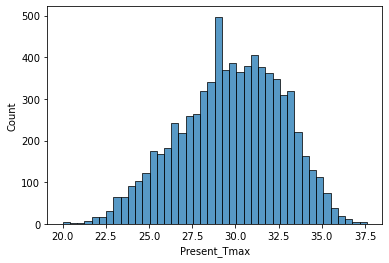

In [70]:
sns.histplot(x='Present_Tmax',data=temp)

<AxesSubplot:xlabel='Present_Tmin', ylabel='Count'>

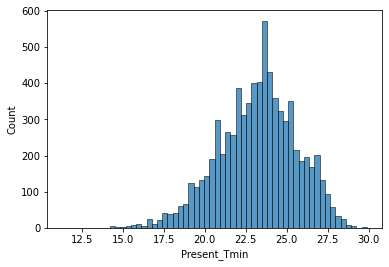

In [71]:
sns.histplot(x='Present_Tmin',data=temp)

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Count'>

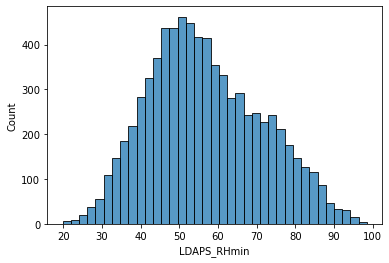

In [72]:
sns.histplot(x='LDAPS_RHmin',data=temp)

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Count'>

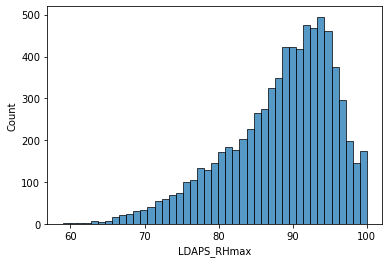

In [73]:
sns.histplot(x='LDAPS_RHmax',data=temp)

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Count'>

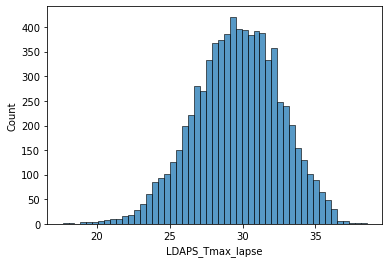

In [74]:
sns.histplot(x='LDAPS_Tmax_lapse',data=temp)

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Count'>

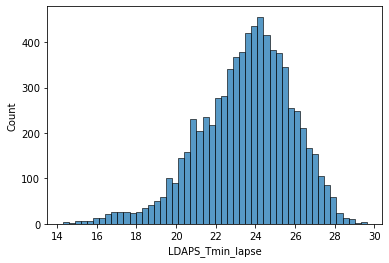

In [75]:
sns.histplot(x='LDAPS_Tmin_lapse',data=temp)

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Count'>

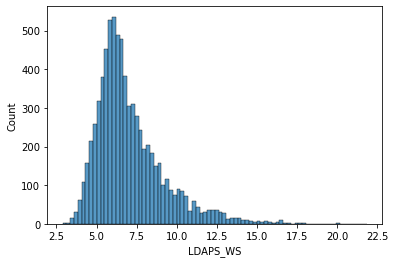

In [76]:
sns.histplot(x='LDAPS_WS',data=temp)

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Count'>

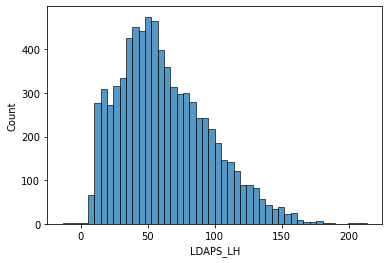

In [77]:
sns.histplot(x='LDAPS_LH',data=temp)

<AxesSubplot:xlabel='LDAPS_CC1', ylabel='Count'>

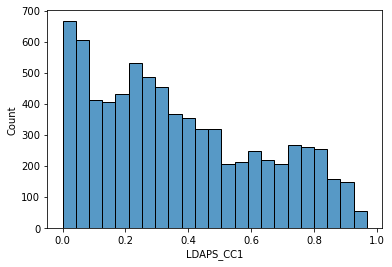

In [78]:
sns.histplot(x='LDAPS_CC1',data=temp)

<AxesSubplot:xlabel='LDAPS_CC2', ylabel='Count'>

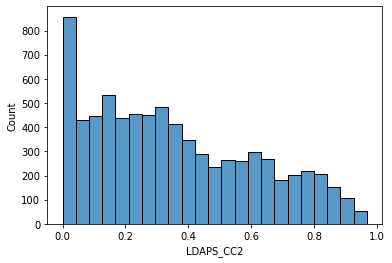

In [79]:
sns.histplot(x='LDAPS_CC2',data=temp)

<AxesSubplot:xlabel='LDAPS_CC3', ylabel='Count'>

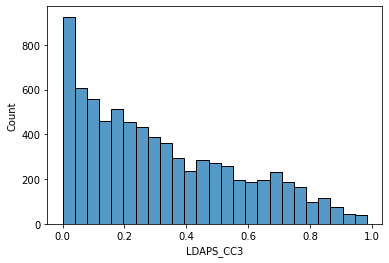

In [80]:
sns.histplot(x='LDAPS_CC3',data=temp)

<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Count'>

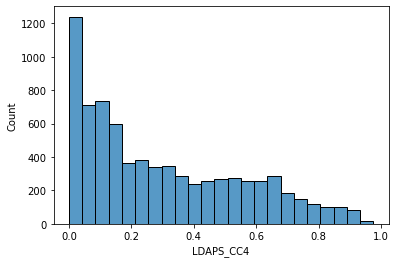

In [81]:
sns.histplot(x='LDAPS_CC4',data=temp)

In [84]:
x = temp.drop(['Next_Tmax','Next_Tmin'],axis=1)
y_max = temp['Next_Tmax']
y_min = temp['Next_Tmin']

In [85]:
x_train,x_test,y_max_train,y_max_test = train_test_split(x,y_max,test_size=0.25, random_state=15)

In [87]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train,y_max_train)
y_max_pred = reg.predict(x_test)
r2_score(y_max_test, y_max_pred)

0.7673765242744554

In [88]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators=10,random_state = 0 )
RFR.fit(x_train, y_max_train)
y_max_pred=RFR.predict(x_test)
r2_score(y_max_test, y_max_pred)

0.8701777188694725

In [89]:
from sklearn.neighbors import KNeighborsRegressor

KNR = KNeighborsRegressor()
KNR.fit(x_train, y_max_train)
y_max_pred=KNR.predict(x_test)
r2_score(y_max_test, y_max_pred)

0.5410901940346153

In [90]:
from sklearn.svm import SVR

SVR_Reg = SVR(kernel = "rbf",degree=3, C=40)
SVR_Reg.fit(x_train, y_max_train)
y_max_pred = SVR_Reg.predict(x_test)
r2_score(y_max_test, y_max_pred)

0.39634607644382935

In [91]:
from sklearn.tree import DecisionTreeRegressor
RTD = DecisionTreeRegressor(random_state = 0)
RTD.fit(x_train, y_max_train)
y_max_pred = RTD.predict(x_test)
r2_score(y_max_test, y_max_pred)

0.7515851037850072

In [92]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(reg, x, y_max, cv=5)
print('Cross validation score of Linear Regression : ',scr.mean())

Cross validation score of Linear Regression :  0.7216067545539063


In [93]:
scr=cross_val_score(RFR, x, y_max, cv=5)
print('Cross validation score of RFR : ',scr.mean())

Cross validation score of RFR :  0.6772471075143318


In [95]:
scr=cross_val_score(KNR, x, y_max, cv=5)
print('Cross validation score of KNR : ',scr.mean())

Cross validation score of KNR :  0.1925459146268062


In [96]:
scr=cross_val_score(SVR_Reg, x, y_max, cv=5)
print('Cross validation score of SVR : ',scr.mean())

Cross validation score of SVR :  0.27117507124651513


In [97]:
scr=cross_val_score(RTD, x, y_max, cv=5)
print('Cross validation score of RTD : ',scr.mean())

Cross validation score of RTD :  0.4313173102376758


In [98]:
x_train,x_test,y_min_train,y_min_test = train_test_split(x,y_min,test_size=0.25, random_state=15)

In [104]:
from sklearn.linear_model import LinearRegression

reg_min = LinearRegression()
reg_min.fit(x_train,y_min_train)
y_min_pred = reg_min.predict(x_test)
r2_score(y_min_test, y_min_pred)

0.8364504535796478

In [105]:
from sklearn.ensemble import RandomForestRegressor

RFR_min = RandomForestRegressor(n_estimators=10,random_state = 0 )
RFR_min.fit(x_train, y_min_train)
y_min_pred=RFR_min.predict(x_test)
r2_score(y_min_test, y_min_pred)

0.887787550746228

In [106]:
from sklearn.neighbors import KNeighborsRegressor

KNR_min = KNeighborsRegressor()
KNR_min.fit(x_train, y_min_train)
y_min_pred=KNR_min.predict(x_test)
r2_score(y_min_test, y_min_pred)

0.5111330677200961

In [107]:
from sklearn.svm import SVR

SVR_Reg_min = SVR(kernel = "rbf",degree=3, C=40)
SVR_Reg_min.fit(x_train, y_min_train)
y_min_pred = SVR_Reg_min.predict(x_test)
r2_score(y_min_test, y_min_pred)

0.444056308269033

In [108]:
from sklearn.tree import DecisionTreeRegressor

RTD_min = DecisionTreeRegressor(random_state = 0)
RTD_min.fit(x_train, y_min_train)
y_min_pred = RTD_min.predict(x_test)
r2_score(y_min_test, y_min_pred)

0.7728538665209712

In [109]:
scr=cross_val_score(reg_min, x, y_max, cv=5)
print('Cross validation score of Linear Regression : ',scr.mean())

Cross validation score of Linear Regression :  0.7216067545539063


In [110]:
scr=cross_val_score(RFR_min, x, y_max, cv=5)
print('Cross validation score of RFR : ',scr.mean())

Cross validation score of RFR :  0.6772471075143318


In [111]:
scr=cross_val_score(KNR_min, x, y_max, cv=5)
print('Cross validation score of KNR : ',scr.mean())

Cross validation score of KNR :  0.1925459146268062


In [112]:
scr=cross_val_score(SVR_Reg_min, x, y_max, cv=5)
print('Cross validation score of SVR : ',scr.mean())

Cross validation score of SVR :  0.27117507124651513


In [113]:
scr=cross_val_score(RTD_min, x, y_max, cv=5)
print('Cross validation score of RTD : ',scr.mean())

Cross validation score of RTD :  0.4313173102376758


Linear Regression Model is having least difference between cross validation score and r2 score so we can choose Linear Regression Model as best model with r2 score of 76.7 while predicting Next_Tmax.


Linear Regression Model is having least difference between cross validation score and r2 score so we can choose Linear Regression Model as best model r2 score of 83.6 while predicting Next_Tmin.

In [123]:
import joblib
joblib.dump(reg,'Next Day Maximum Temperature Prediction.pkl')

['Next Day Maximum Temperature Prediction.pkl']

In [124]:
joblib.dump(reg_min,'Next Day Minimum Temperature Prediction.pkl')

['Next Day Minimum Temperature Prediction.pkl']